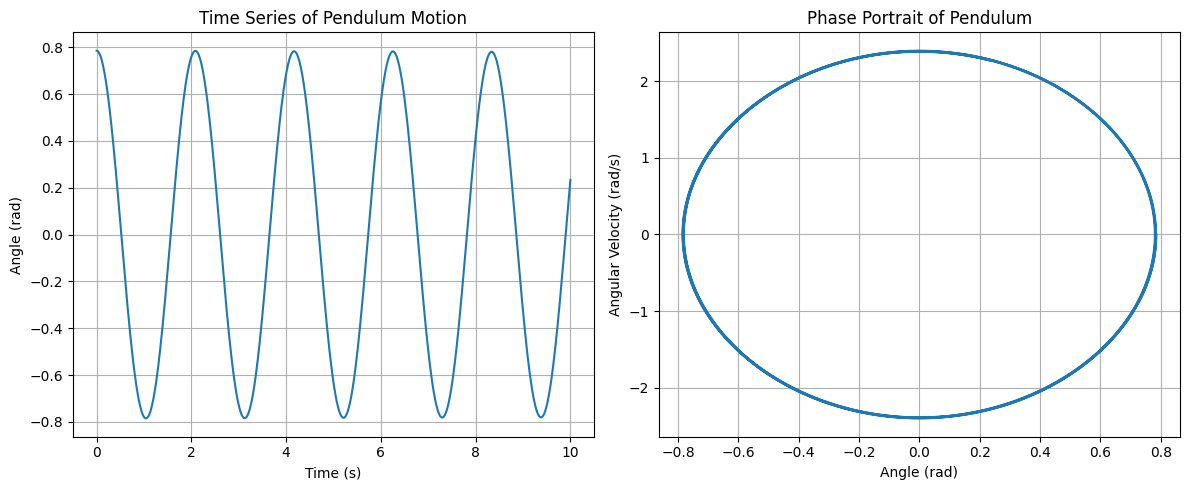

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants for the simple pendulum (no damping, no external force)
g = 9.81  # gravity (m/s^2)
L = 1.0   # length of pendulum (m)
b = 0.0   # damping coefficient
F = 0.0   # external force

# Define the system of differential equations for the simple pendulum
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Initial conditions: [initial angle (rad), initial angular velocity (rad/s)]
y0 = [np.pi / 4, 0.0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODE
sol = solve_ivp(pendulum, t_span, y0, t_eval=t_eval)

# Plot time series (theta vs time)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.title('Time Series of Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)

# Plot phase portrait (omega vs theta)
plt.subplot(1, 2, 2)
plt.plot(sol.y[0], sol.y[1])
plt.title('Phase Portrait of Pendulum')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

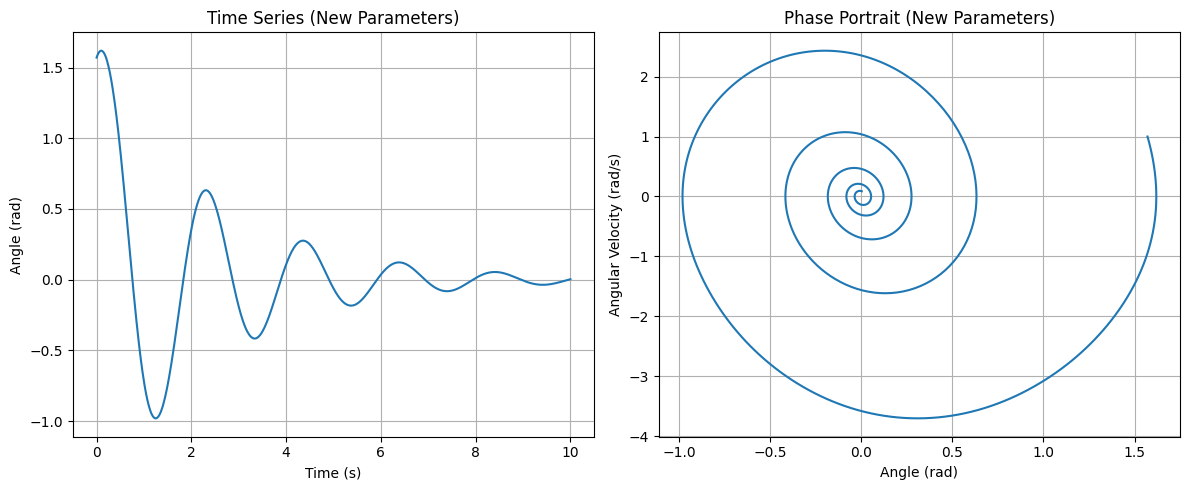

In [3]:
# New parameters for the damped pendulum
b_new = 0.8  # increased damping
y0_new = [np.pi / 2, 1.0]  # new initial conditions: larger initial angle and non-zero initial velocity

# Define the new damped pendulum function with updated damping
def damped_pendulum_new(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(b_new * omega) - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solve the ODE with new initial conditions and damping
sol_damped_new = solve_ivp(damped_pendulum_new, t_span, y0_new, t_eval=t_eval)

# Plot time series and phase portrait with new parameters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_damped_new.t, sol_damped_new.y[0])
plt.title('Time Series (New Parameters)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sol_damped_new.y[0], sol_damped_new.y[1])
plt.title('Phase Portrait (New Parameters)')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

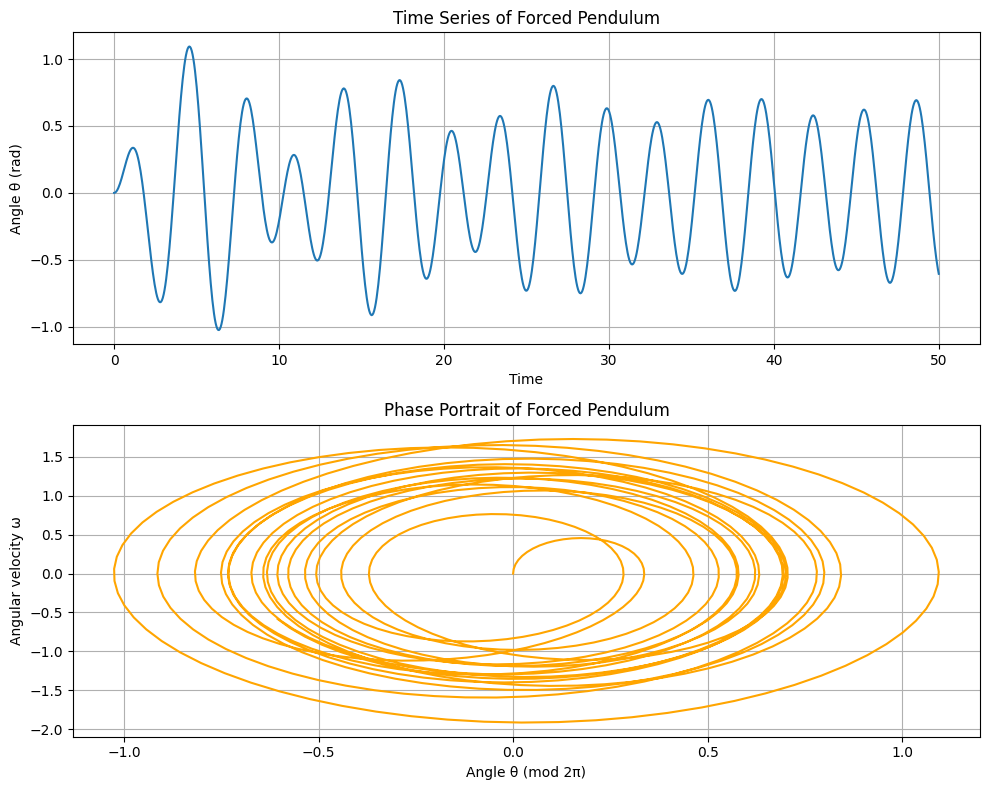

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
gamma = 0.1        # damping
omega0 = 1.5       # natural frequency
A = 1.2            # amplitude of driving force
Omega = 2.0        # driving frequency

# Time span
t_start, t_end = 0, 50
t_eval = np.linspace(t_start, t_end, 1000)

# Differential equation system
def forced_pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -gamma * omega - omega0**2 * np.sin(theta) + A * np.cos(Omega * t)
    return [dtheta_dt, domega_dt]

# Initial conditions
y0 = [0.0, 0.0]  # [theta(0), omega(0)]

# Solve the ODE
sol = solve_ivp(forced_pendulum, [t_start, t_end], y0, t_eval=t_eval)

# Extract results
theta = sol.y[0]
omega = sol.y[1]
time = sol.t

# Normalize theta between -π and π for phase portrait
theta_mod = (theta + np.pi) % (2 * np.pi) - np.pi

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Time series
ax1.plot(time, theta, label='θ(t)')
ax1.set_title('Time Series of Forced Pendulum')
ax1.set_xlabel('Time')
ax1.set_ylabel('Angle θ (rad)')
ax1.grid(True)

# Phase portrait
ax2.plot(theta_mod, omega, label='Phase Portrait', color='orange')
ax2.set_title('Phase Portrait of Forced Pendulum')
ax2.set_xlabel('Angle θ (mod 2π)')
ax2.set_ylabel('Angular velocity ω')
ax2.grid(True)

plt.tight_layout()
plt.show()
